<a href="https://colab.research.google.com/github/Farhan-BA/Python-/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

In [25]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_dat

True

In [12]:
text = """Apple Inc. is a global leader in consumer electronics and digital innovation, renowned for its cutting-edge technologies that blend sleek design with powerful performance. From the iPhone and iPad to the Mac and Apple Watch, Apple creates seamless hardware and software ecosystems. Its proprietary technologies, such as the A-series and M-series chips, offer exceptional speed and energy efficiency. Apple also leads in software innovation with platforms like iOS, macOS, and services like iCloud, Siri, and Apple Pay. With a strong focus on privacy, user experience, and integration, Apple continues to shape the future of technology."""

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleaned_text = clean_text(text)

In [14]:
sentence_tokens = sent_tokenize(cleaned_text)
word_tokens = word_tokenize(cleaned_text)

In [15]:
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in word_tokens if word not in stop_words]

In [16]:
print("Original Word Count:", len(word_tokens))
print("Word Count After Stopword Removal:", len(filtered_words))

Original Word Count: 95
Word Count After Stopword Removal: 63


In [17]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [18]:
sample_words = filtered_words[:10]
stemmed_words = [stemmer.stem(word) for word in sample_words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in sample_words]

In [19]:
print("\nSample Words:", sample_words)
print("Stemmed:", stemmed_words)
print("Lemmatized:", lemmatized_words)



Sample Words: ['apple', 'inc', 'global', 'leader', 'consumer', 'electronics', 'digital', 'innovation', 'renowned', 'cuttingedge']
Stemmed: ['appl', 'inc', 'global', 'leader', 'consum', 'electron', 'digit', 'innov', 'renown', 'cuttingedg']
Lemmatized: ['apple', 'inc', 'global', 'leader', 'consumer', 'electronics', 'digital', 'innovation', 'renowned', 'cuttingedge']


In [22]:
pos_tags = nltk.pos_tag(filtered_words)
pos_counts = Counter(tag for word, tag in pos_tags)

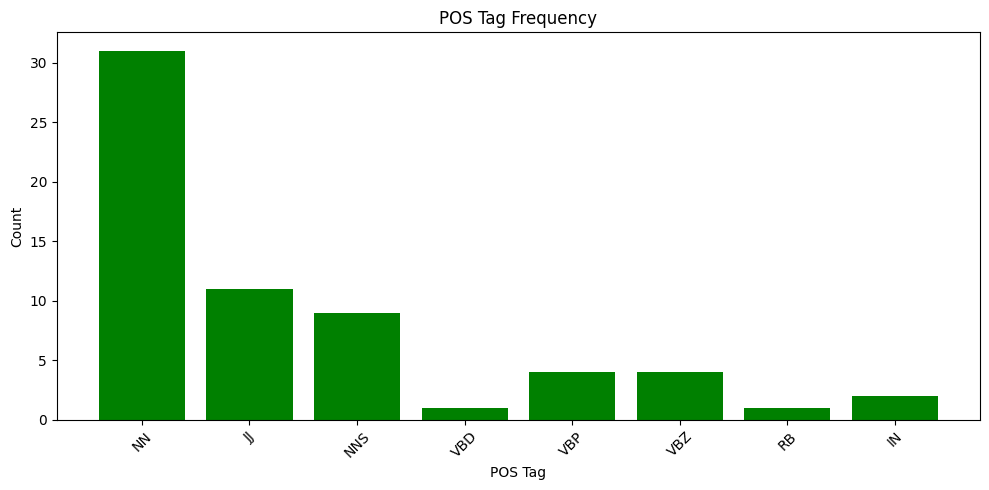

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values(), color='green')
plt.title("POS Tag Frequency")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
ner_tree = nltk.ne_chunk(nltk.pos_tag(word_tokenize(text)))
named_entities = []

In [27]:
for subtree in ner_tree:
    if hasattr(subtree, 'label'):
        entity_name = " ".join([leaf[0] for leaf in subtree.leaves()])
        entity_type = subtree.label()
        named_entities.append((entity_name, entity_type))

In [28]:
print("\nNamed Entities:")
for ent, label in named_entities:
    print(f"{ent} --> {label}")



Named Entities:
Apple --> PERSON
Inc. --> ORGANIZATION
iPhone --> ORGANIZATION
iPad --> ORGANIZATION
Mac --> ORGANIZATION
Apple Watch --> PERSON
Apple --> PERSON
Apple --> PERSON
iOS --> ORGANIZATION
macOS --> ORGANIZATION
iCloud --> ORGANIZATION
Siri --> PERSON
Apple Pay --> PERSON
Apple --> PERSON


In [29]:
import spacy
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [30]:
nlp = spacy.load("en_core_web_sm")

In [31]:
doc = nlp(text)

In [32]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)